# Handwritten Digit Recognition

The goal of this project is to build a Convolutional Neural Network (CNN) to recognize handwritten digits from the MNIST dataset. The MNIST dataset contains 70,000 grayscale images of digits (0-9), each 28x28 pixels in size. Using TensorFlow and Keras, we will create and train a deep learning model to classify these digits accurately. The project involves data preprocessing, model building, training, and evaluation to understand CNNs and their application .

## Data collection and Preprocessing

### Loading the MNIST Dataset

In [59]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [60]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

#### Findng the Class distribution

In [61]:
# This step is not necessory
print("Class Distribution in Training Data:")
for digit, count in class_distribution.items():
    print(f'Digit {digit}: {count}')

Class Distribution in Training Data:
Digit 0: 5923
Digit 1: 6742
Digit 2: 5958
Digit 3: 6131
Digit 4: 5842
Digit 5: 5421
Digit 6: 5918
Digit 7: 6265
Digit 8: 5851
Digit 9: 5949


### Normalization

In [62]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

### Reshaping the Data

In [63]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [64]:
print(x_train.shape)  # Should print (60000, 28, 28, 1)
print(y_train.shape)  # Should print (60000, 10)

(60000, 28, 28, 1)
(60000,)


### One-Hot Encoding of Labels

In [65]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Building the CNN Model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons

### Compiling the Model

In [67]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [68]:
# Train the model
trained_model = model.fit(x_train, y_train, 
                    validation_split=0.2, 
                    epochs=10, 
                    batch_size=30)

Epoch 1/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.8941 - loss: 0.3485 - val_accuracy: 0.9817 - val_loss: 0.0609
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9856 - loss: 0.0475 - val_accuracy: 0.9856 - val_loss: 0.0505
Epoch 3/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9889 - loss: 0.0322 - val_accuracy: 0.9872 - val_loss: 0.0462
Epoch 4/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9929 - loss: 0.0213 - val_accuracy: 0.9863 - val_loss: 0.0531
Epoch 5/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9949 - loss: 0.0162 - val_accuracy: 0.9887 - val_loss: 0.0440
Epoch 6/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9965 - loss: 0.0115 - val_accuracy: 0.9877 - val_loss: 0.0444
Epoch 7/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9974 - loss: 0.0087 - val_accuracy: 0.9882 - val_loss: 0.0439
Epoch 8/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9980 -

## Evaluating the Model

In [69]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9891 - loss: 0.0474
Test accuracy: 0.9905


### Plotting Training and Validation Metrics

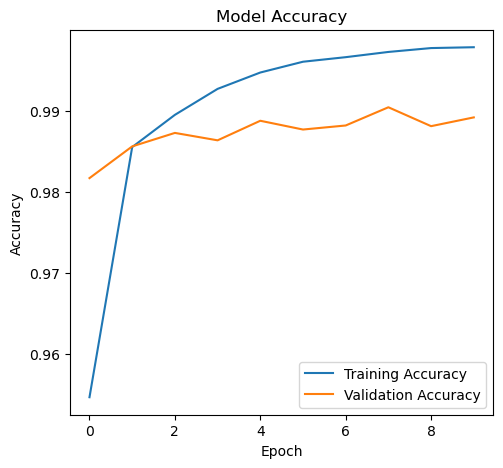

In [71]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'], label='Training Accuracy')
plt.plot(trained_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

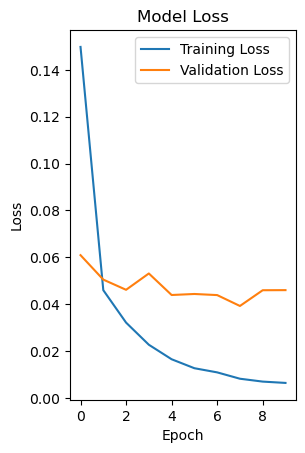

In [72]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'], label='Training Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## Loading and Preprocessing a New Image

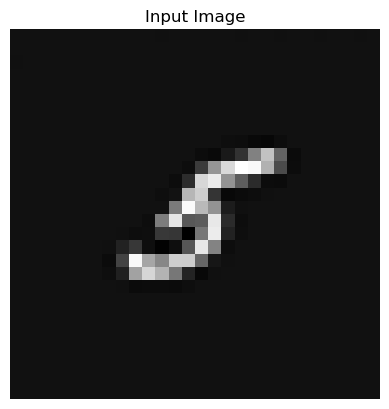

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [74]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

image_path = "D:/Linked IN posts/Handwritten-digits-from-the-MNIST-data-set-5-If-f-denotes-the-image-of-the-handwritten_Q640.jpg"  
image = Image.open(image_path)

image = image.resize((28, 28))

image = image.convert('L')  

image_array = np.array(image)

image_array = image_array.astype('float32') / 255.0

image_array = image_array.reshape((1, 28, 28, 1))  # Shape: (1, 28, 28, 1)

plt.imshow(image_array[0, :, :, 0], cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.show()

predicted = model.predict(image_array)
predicted_class = np.argmax(predicted)

In [ ]:
predicted = model.predict(image_array)
predicted_class = np.argmax(predicted)

# Print the predicted probabilities and the predicted class
print("Predicted probabilities:", predicted)
print(f'The predicted digit is: {predicted_class}')